In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
np.random.randint(1,8)

3

In [306]:
data = pd.read_excel("O:/pricing/Average Spreads/02052019_Current_Pricing_Data.xlsx")
data.head()

,dealType,class,isIO,Vintage,overrideType,wal,swapspread,Trepp,ratingOrdinal,cusip,dealname,price,yield,overrideValue,comments,spread,dm,price.1
0,SnglAsset/Borr,A1,NaN,2005.0,A,3.0,67.1370,AAA,NaN,682439AA2,116605c6,106.26949,3.30037,-7.0,test (tk;1/31/19). Adj S+72 (cm;2017-08-30 2:2...,78.98579,NaN,106.26949
1,SnglAsset/Borr,A2,NaN,2005.0,A,7.0,110.0290,AAA,NaN,682439AC8,116605c6,112.65863,3.75677,11.0,Adj S+123 (cm;2017-08-30 2:22 PM).,114.30915,NaN,112.65863
2,SnglAsset/Borr,A3,NaN,2005.0,A,11.0,155.3175,AAA,NaN,682439AE4,116605c6,112.61407,4.29788,34.0,Adj S+173 (cm;2017-08-30 2:22 PM). Mrkt px cha...,157.85252,NaN,112.61407
3,SnglAsset/Borr,B,NaN,2005.0,A,13.0,193.4508,AA1,NaN,682439AG9,116605c6,109.91968,4.71619,29.0,Adj S+203 (cm;2017-08-30 2:22 PM). Mrkt px cha...,196.46688,NaN,109.91968
4,SnglAsset/Borr,C,NaN,2005.0,A,14.0,204.4098,AA2,NaN,682439AJ3,116605c6,108.95353,4.83517,28.0,Adj S+205 (cm;2017-08-30 2:22 PM). Mrkt px cha...,207.54811,NaN,108.95353


In [14]:
data.columns

Index(['dealType', 'class', 'isIO', 'Vintage', 'overrideType', 'wal',
       'swapspread', 'Trepp', 'ratingOrdinal', 'cusip', 'dealname', 'price',
       'yield', 'overrideValue', 'comments', 'spread', 'dm', 'price.1'],
      dtype='object')

In [18]:
data = data[data['overrideType'] == "A"]
df = data
df = pd.concat([df['class'],df['wal'],df['ratingOrdinal'],df['swapspread']],axis = 1)

In [ ]:
def tranform_data_into_category(data):
    for x in data.columns:
        data = pd.get_dummies(data, columns=[x])
    return data

In [21]:
df = pd.get_dummies(df, columns=['class'])
df.head()

,wal,ratingOrdinal,swapspread,class_7E-A,class_A,class_A1,class_A10,class_A2,class_A3,class_A4,...,class_PEZ,class_PO,class_PST,class_R,class_RR,class_T,class_U,class_V,class_W,class_Z
0,3.0,NaN,67.1370,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.0,NaN,110.0290,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.0,NaN,155.3175,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,NaN,193.4508,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.0,NaN,204.4098,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.columns

Index(['wal', 'ratingOrdinal', 'swapspread', 'class_7E-A', 'class_A',
       'class_A1', 'class_A10', 'class_A2', 'class_A3', 'class_A4', 'class_A5',
       'class_A6', 'class_A7', 'class_AFX', 'class_AH', 'class_AJ', 'class_AL',
       'class_AM', 'class_ASB', 'class_B', 'class_C', 'class_D', 'class_E',
       'class_F', 'class_G', 'class_H', 'class_I', 'class_IO', 'class_J',
       'class_K', 'class_L', 'class_M', 'class_N', 'class_O', 'class_PEZ',
       'class_PO', 'class_PST', 'class_R', 'class_RR', 'class_T', 'class_U',
       'class_V', 'class_W', 'class_Z'],
      dtype='object')

In [24]:
target = df['swapspread']
variables = df.drop(columns = 'swapspread')

In [27]:
from sklearn.preprocessing import normalize
variables = variables.dropna()
variables = normalize(variables)
variables

array([[0.        , 0.99995   , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.009999  , 0.99990001, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.019995  , 0.99975009, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09949879, 0.99498793, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09949879, 0.99498793, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09949879, 0.99498793, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [194]:
def get_initial_centroids(data, k, seed=None):
    if seed is not None: # useful for obtaining consistent results
        np.random.seed(seed)
    n = data.shape[0] # number of data points
        
    # Pick K indices from range [0, N).
    rand_indices = np.random.randint(0, n, k)
    
    # Keep centroids as dense format, as many entries will be nonzero due to averaging.
    # As long as at least one document in a cluster contains a word,
    # it will carry a nonzero weight in the TF-IDF vector of the centroid.
    centroids = np.array(data[rand_indices,:])
    
    return centroids

In [195]:
## step2 assign cluster 
from sklearn.metrics import pairwise_distances 
queries = variables[100:102,:]
dis = pairwise_distances(variables, queries,metric = "euclidean")
dis

array([[1.05411363, 0.08104414],
       [1.04566916, 0.06981266],
       [1.03720132, 0.06146402],
       ...,
       [0.96885476, 0.02432848],
       [0.96885476, 0.02432848],
       [0.96885476, 0.02432848]])

In [196]:
## check 
## assume we initialize three centroids with first 3 rows of variables 
## find the disctance between row 430 and 2nd centroid 
first_3_centroid = variables[:3,:]
distances = pairwise_distances(variables, first_3_centroid, metric = "euclidean")
distances[430,1]

1.2632874653161636

In [197]:
distances = distances.copy()
closest_cluster = np.argmin(distances, axis = 1)

In [198]:
first_3_centroid.shape

(3, 43)

In [199]:
closest_cluster.shape

(4599,)

In [200]:
variables.shape

(4599, 43)

In [201]:
## check the distances within certain threshold
reference =  [ min(rows) for rows in distances]
if np.allclose(closest_cluster, reference):
    print('Pass')
else:
    print('Check your code again')

Check your code again


In [202]:
def assign_clusters(data, centroids):
    
    # Compute distances between each data point and the set of centroids:
    # Fill in the blank (RHS only)
    distances_from_centroids = pairwise_distances(data, centroids, metric='euclidean')
    
    # Compute cluster assignments for each data point:
    # Fill in the blank (RHS only)
    cluster_assignment = np.argmin(distances_from_centroids, axis=1)
    
    return cluster_assignment

In [249]:
data = np.array([[1., 2., 0.],
                 [0., 0., 0.],
                 [2., 2., 0.]])
centroids = np.array([[0.5, 0.5, 0.],
                      [0., -0.5, 0.]])

cluster_assignment = assign_clusters(data, centroids)
centroids = revise_centroids(data, k, cluster_assignment)
score = compute_heterogeneity(data, k, centroids, cluster_assignment)
print (cluster_assignment)

[0 1 0]


C:\Users\AQi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
C:\Users\AQi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [204]:
data[cluster_assignment == 0].mean(axis = 0)

array([1.5, 2. , 0. ])

In [205]:
def centroids_remove_nan(centroids):
    centroids = pd.DataFrame(centroids)
    centroids = centroids.dropna()
    centroids = np.array(centroids)
    return centroids

In [206]:
def revise_centroids(data, k, cluster_assignment):
    new_centroids = []
    for i in range(k):
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment==i]
        # Compute the mean of the data points. Fill in the blank (RHS only)
        centroid = member_data_points.mean(axis=0)
        
        # Convert numpy.matrix type to numpy.ndarray type
        centroid = np.array(centroid)
        new_centroids.append(centroid)
    new_centroids = np.array(new_centroids)
    new_centroids = centroids_remove_nan(new_centroids)
    return new_centroids

In [207]:
def compute_heterogeneity(data, k, centroids, cluster_assignment):
    
    heterogeneity = 0.0
    for i in range(k):
        
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment==i, :]
        
        if member_data_points.shape[0] > 0: # check if i-th cluster is non-empty
            # Compute distances from centroid to data points (RHS only)
            distances = pairwise_distances(member_data_points, [centroids[i]], metric='euclidean')
            squared_distances = distances**2
            heterogeneity += np.sum(squared_distances)
        
    return heterogeneity

In [208]:
compute_heterogeneity(data, 2, centroids, cluster_assignment)

7.25

In [254]:
# Fill in the blanks
def kmeans(data, k, initial_centroids, maxiter, record_heterogeneity=None, verbose=False):

    centroids = initial_centroids[:]
    prev_cluster_assignment = None

    for itr in range(maxiter):        
        if verbose:
            print(itr)

        # 1. Make cluster assignments using nearest centroids
        # YOUR CODE HERE
        cluster_assignment = assign_clusters(data, centroids)

        # 2. Compute a new centroid for each of the k clusters, averaging all data points assigned to that cluster.
        # YOUR CODE HERE
        centroids = revise_centroids(data, k, cluster_assignment)

        # Check for convergence: if none of the assignments changed, stop
        if prev_cluster_assignment is not None and \
          (prev_cluster_assignment==cluster_assignment).all():
            break

        # Print number of new assignments 
        if prev_cluster_assignment is not None:
            num_changed = sum(abs(prev_cluster_assignment-cluster_assignment))
            if verbose:
                print('    {0:5d} elements changed their cluster assignment.'.format(num_changed))   

        # Record heterogeneity convergence metric
        if record_heterogeneity is not None:
            # YOUR CODE HERE
            score = compute_heterogeneity(data, k, centroids, cluster_assignment)
            record_heterogeneity.append(score)

        prev_cluster_assignment = cluster_assignment[:]
    #plot_heterogeneity( record_heterogeneity, k)
    return centroids, cluster_assignment

In [255]:
def plot_heterogeneity(heterogeneity, k):
    plt.figure(figsize=(7,4))
    plt.plot(heterogeneity, linewidth=4)
    plt.xlabel('# Iterations')
    plt.ylabel('Heterogeneity')
    plt.title('Heterogeneity of clustering over time, K={0:d}'.format(k))
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [256]:
k = 3
heterogeneity = []
initial_centroids = get_initial_centroids(variables, k, seed=0)
centroids, cluster_assignment= kmeans(variables, k, initial_centroids, maxiter=400,
                                       record_heterogeneity=heterogeneity, verbose=True)
#plot_heterogeneity(record_heterogeneity , k)

0
1
      466 elements changed their cluster assignment.
2
       77 elements changed their cluster assignment.
3
       20 elements changed their cluster assignment.
4


In [257]:
k = 10
heterogeneity = {}
cluster_assignment_dict = {}
import time
import  sys
start = time.time()
tf_idf = variables
for seed in [0, 20000, 40000, 60000, 80000, 100000, 120000]:
    initial_centroids = get_initial_centroids(tf_idf, k, seed)
    centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                           record_heterogeneity=None, verbose=False)
    # To save time, compute heterogeneity only once in the end
    heterogeneity[seed] = compute_heterogeneity(tf_idf, k, centroids, cluster_assignment)
    cluster_assignment_dict[seed] = np.bincount(cluster_assignment)
    print('seed={0:06d}, heterogeneity={1:.5f}, cluster_distribution={2}'.format(seed, heterogeneity[seed], 
                                           cluster_assignment_dict[seed]))
    sys.stdout.flush()
#end = time.time()
#print(end-start)

seed=000000, heterogeneity=171.91387, cluster_distribution=[   8  278  161  925   55 1860  315  509   51  437]
seed=020000, heterogeneity=151.51686, cluster_distribution=[  55    8  250 1796 1486  377   29  253  173  172]
seed=040000, heterogeneity=153.87471, cluster_distribution=[ 285  173  332  740   31   31 1124  275  138 1470]
seed=060000, heterogeneity=129.72988, cluster_distribution=[ 173  344   55  365  464  294  593  280  172 1859]
seed=080000, heterogeneity=136.83210, cluster_distribution=[ 106 1910  779  449  165  185   89  328  588]
seed=100000, heterogeneity=189.36364, cluster_distribution=[   7  447  405   55 1943  372  846  517    7]


C:\Users\AQi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
C:\Users\AQi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\AQi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
C:\Users\AQi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\AQi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
C:\Users\AQi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret,

seed=120000, heterogeneity=161.71281, cluster_distribution=[  55 2054   51  372  261  599  247  281  172  507]


In [264]:
def smart_initialize(data, k, seed=None):
    '''Use k-means++ to initialize a good set of centroids'''
    if seed is not None: # useful for obtaining consistent results
        np.random.seed(seed)
    centroids = np.zeros((k, data.shape[1]))
    
    # Randomly choose the first centroid.
    # Since we have no prior knowledge, choose uniformly at random
    idx = np.random.randint(data.shape[0])
    centroids[0] = data[idx,:]
    # Compute distances from the first centroid chosen to all the other data points
    distances = pairwise_distances(data, centroids[0:1], metric='euclidean').flatten()
    
    for i in range(1, k):
        # Choose the next centroid randomly, so that the probability for each data point to be chosen
        # is directly proportional to its squared distance from the nearest centroid.
        # Roughtly speaking, a new centroid should be as far as from ohter centroids as possible.
        idx = np.random.choice(data.shape[0], 1, p=distances/sum(distances))
        centroids[i] = data[idx,:]
        # Now compute distances from the centroids to all data points
        distances = np.min(pairwise_distances(data, centroids[0:i+1], metric='euclidean'),axis=1)
    
    return centroids

In [265]:
k = 10
heterogeneity_smart = {}
start = time.time()
for seed in [0, 20000, 40000, 60000, 80000, 100000, 120000]:
    initial_centroids = smart_initialize(tf_idf, k, seed)
    centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                           record_heterogeneity=None, verbose=False)
    # To save time, compute heterogeneity only once in the end
    heterogeneity_smart[seed] = compute_heterogeneity(tf_idf, k, centroids, cluster_assignment)
    print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity_smart[seed]))
    sys.stdout.flush()
end = time.time()
print(end-start)

seed=000000, heterogeneity=183.87770
seed=020000, heterogeneity=161.89208
seed=040000, heterogeneity=159.34157
seed=060000, heterogeneity=150.31168
seed=080000, heterogeneity=171.62800
seed=100000, heterogeneity=132.24140
seed=120000, heterogeneity=133.98515
0.46473264694213867


In [277]:
lst = []
for key , values in heterogeneity.items():
    print(values)
    

171.91387273334385


AttributeError: 'list' object has no attribute 'apend'

In [273]:
[item for item in heterogeneity]

[0, 20000, 40000, 60000, 80000, 100000, 120000]

In [280]:
list(heterogeneity.values())

[171.91387273334385,
 151.5168580299174,
 153.87470511629974,
 129.72987514380287,
 136.83209520180444,
 189.36364352523506,
 161.71281377561166]

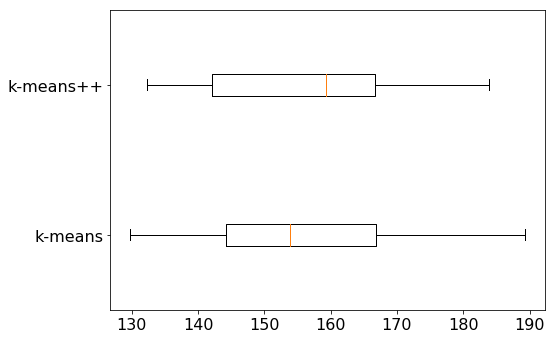

In [281]:
plt.figure(figsize=(8,5))
plt.boxplot([list(heterogeneity.values()), list(heterogeneity_smart.values())], vert=False)
plt.yticks([1, 2], ['k-means', 'k-means++'])
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

In [283]:
def kmeans_multiple_runs(data, k, maxiter, num_runs, seed_list=None, verbose=False):
    heterogeneity = {}
    
    min_heterogeneity_achieved = float('inf')
    best_seed = None
    final_centroids = None
    final_cluster_assignment = None
    
    for i in range(num_runs):
        
        # Use UTC time if no seeds are provided 
        if seed_list is not None: 
            seed = seed_list[i]
            np.random.seed(seed)
        else: 
            seed = int(time.time())
            np.random.seed(seed)
        
        # Use k-means++ initialization
        initial_centroids = smart_initialize(data, k, seed=seed)
        
        # Run k-means
        centroids, cluster_assignment = kmeans(data, k, initial_centroids, maxiter=400,
                                               record_heterogeneity=None, verbose=False)
        
        # To save time, compute heterogeneity only once in the end
        heterogeneity[seed] = compute_heterogeneity(data, k, centroids, cluster_assignment)
        
        if verbose:
            print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity[seed]))
            sys.stdout.flush()
        
        # if current measurement of heterogeneity is lower than previously seen,
        # update the minimum record of heterogeneity.
        if heterogeneity[seed] < min_heterogeneity_achieved:
            min_heterogeneity_achieved = heterogeneity[seed]
            best_seed = seed
            final_centroids = centroids
            final_cluster_assignment = cluster_assignment
    
    # Return the centroids and cluster assignments that minimize heterogeneity.
    return final_centroids, final_cluster_assignment

In [286]:
num_runs = 10
final_centroids, final_cluster_assignment = kmeans_multiple_runs(variables, k, maxiter, num_runs, seed_list=None, verbose=False)

In [289]:
np.unique(final_cluster_assignment)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

seed=000000, heterogeneity=386.45972
seed=020000, heterogeneity=386.45972
seed=040000, heterogeneity=386.45972
seed=060000, heterogeneity=386.45972
seed=080000, heterogeneity=386.45972
seed=100000, heterogeneity=386.45972
seed=120000, heterogeneity=386.45972
seed=000000, heterogeneity=183.87770
seed=020000, heterogeneity=161.89208
seed=040000, heterogeneity=159.34157
seed=060000, heterogeneity=150.31168
seed=080000, heterogeneity=171.62800
seed=100000, heterogeneity=132.24140
seed=120000, heterogeneity=133.98515
seed=000000, heterogeneity=69.15438
seed=020000, heterogeneity=77.54334
seed=040000, heterogeneity=65.64864
seed=060000, heterogeneity=75.77837
seed=080000, heterogeneity=72.26645
seed=100000, heterogeneity=72.81816
seed=120000, heterogeneity=58.89642
seed=000000, heterogeneity=35.38157
seed=020000, heterogeneity=26.71428
seed=040000, heterogeneity=25.50168
seed=060000, heterogeneity=26.74125
seed=080000, heterogeneity=30.86361
seed=100000, heterogeneity=39.21828
seed=120000, h

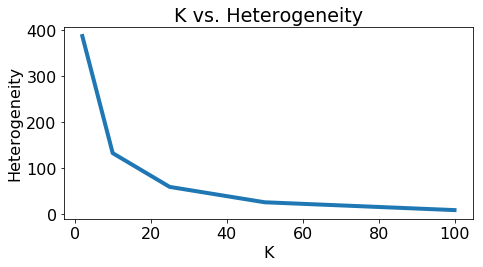

In [295]:
def plot_k_vs_heterogeneity(k_values, heterogeneity_values):
    plt.figure(figsize=(7,4))
    plt.plot(k_values, heterogeneity_values, linewidth=4)
    plt.xlabel('K')
    plt.ylabel('Heterogeneity')
    plt.title('K vs. Heterogeneity')
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

start = time.time()
centroids = {}
cluster_assignment = {}
heterogeneity_values = []
k_list = [2, 10, 25, 50, 100]
seed_list = [0, 20000, 40000, 60000, 80000, 100000, 120000]

for k in k_list:
    heterogeneity = []
    centroids[k], cluster_assignment[k] = kmeans_multiple_runs(tf_idf, k, maxiter=400,
                                                               num_runs=len(seed_list),
                                                               seed_list=seed_list,
                                                               verbose=True)
    score = compute_heterogeneity(tf_idf, k, centroids[k], cluster_assignment[k])
    heterogeneity_values.append(score)

plot_k_vs_heterogeneity(k_list, heterogeneity_values)

end = time.time()
print(end-start)

In [317]:
def visualize_clusters(tf_idf, centroids, cluster_assignment, k, display_content=True):
    ''''''
    
    print('==========================================================')

    # Visualize each cluster c
    for c in range(k):
        # Cluster heading
        print('Cluster {0:d}    '.format(c)),
        # Print top k words with largest TF-IDF weights in the cluster
        idx = centroids[c].argsort()[::-1]
        #print(tf_idf[idx])
        
        if display_content:
            # Compute distances from the centroid to all data points in the cluster,
            # and compute nearest neighbors of the centroids within the cluster.
            distances = pairwise_distances(tf_idf, centroids[c].reshape(1, -1), metric='euclidean').flatten()
            distances[cluster_assignment!=c] = float('inf') # remove non-members from consideration
            nearest_neighbors = distances.argsort()
            # For 3 nearest neighbors, print the title as well as first 180 characters of text.
            for i in range(3):
                print(nearest_neighbors[i])
        print('==========================================================')

In [318]:
k = 2
initial_centroids = get_initial_centroids(variables, k, seed=0)
heterogeneity = []
centroids, cluster_assignment= kmeans(variables, k, initial_centroids, maxiter=400,
                                       record_heterogeneity=heterogeneity, verbose=True)
visualize_document_clusters( tf_idf, centroids, cluster_assignment, k, display_content=True)

0
1
       33 elements changed their cluster assignment.
2
       17 elements changed their cluster assignment.
3
Cluster 0    
3091
1791
3257
Cluster 1    
3343
3688
1509
